<a href="https://colab.research.google.com/github/raspberrykat/scientific-computation-application/blob/main/scientific%20computation%20app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSetAol.csv', header = None)

data = data.transpose()
data.columns = ['Month', 'Production']
data['Month'] = np.arange(1, len(data) + 1)

data.head()


,Month,Production
0,1,1863
1,2,1614
2,3,2570
3,4,1685
4,5,2101


In [ ]:
data.describe()

,Month
count,144.000000
mean,72.500000
std,41.713307
min,1.000000
25%,36.750000
50%,72.500000
75%,108.250000
max,144.000000


In [ ]:
#1
x = data['Month'].values
y = data['Production'].values

x = x.reshape(-1, 1)


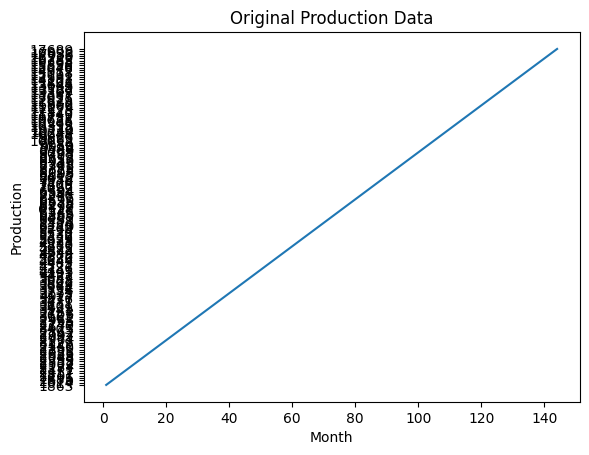

In [ ]:
plt.plot(x, y, label='Original Data')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Original Production Data')
plt.show()

In [ ]:
polynomial = PolynomialFeatures(degree=4)
xPolynomial = polynomial.fit_transform(x)

linearModel = LinearRegression()
linearModel.fit(xPolynomial, y)


LinearRegression()

In [ ]:
#2
def productionPrediction(month):
  monthPolynomial = polynomial.transform(np.array([[month]]))
  return linearModel.predict(monthPolynomial)[0]

Prediction = productionPrediction(145)
print("Predicted production for M145:", Prediction)

Predicted production for M145: 17737.246177524965


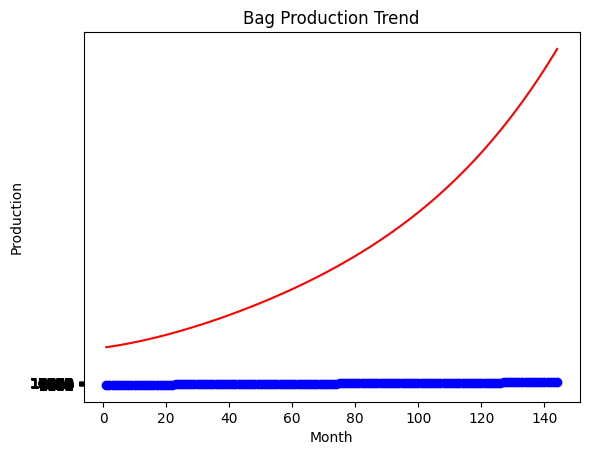

In [ ]:
#2 (for visualizing)
xPrediction = np.linspace(1, len(y), 100).reshape(-1, 1)
xPrediction_polynomial = polynomial.transform(xPrediction)
yPrediction = linearModel.predict(xPrediction_polynomial)

#1 (visualizing)
plt.scatter(x, y, color='blue', label='Actual Production')
plt.plot(xPrediction, yPrediction, color='red', label='Fitted Curve'.format(degree=4))
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Bag Production Trend')
plt.show()

In [ ]:
#3 (bisection)

# Warehouse capacity
def productionDifference(month):
  return productionPrediction(month) - 25000

def bisection(f, a, b, tolerance=1e-5):
  while (b - a) / 2 > tolerance:
    midpoint = (a + b) / 2
    if f(midpoint) == 0:
      return midpoint
    elif f(a) * f(midpoint) < 0:
      b = midpoint
    else:
      a = midpoint
  return (a + b) / 2

root = bisection(productionDifference, 1, len(data))
print("Exact month to start building a new EGIER warehouse: M", root)
print("Month to start building a new EGIER warehouse after rounding≈ M", round(root))

Exact month to start building a new EGIER warehouse: M 143.9999914765358
Month to start building a new EGIER warehouse after rounding≈ M 144


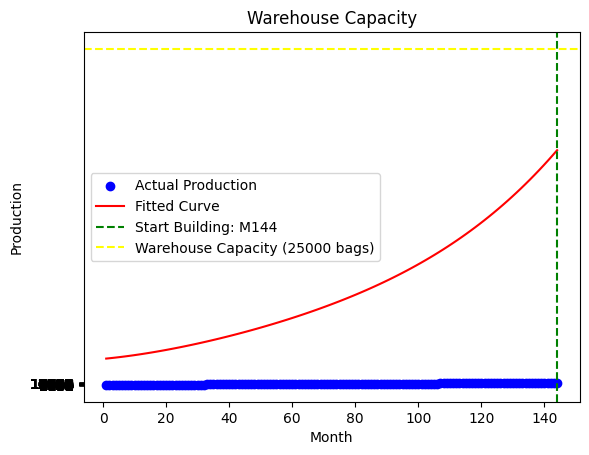

In [ ]:
#3 (visualizing)

build_month = round(root)

plt.scatter(x, y, color='blue', label='Actual Production')
plt.plot(xPrediction, yPrediction, color='red', label='Fitted Curve')
plt.axvline(x=build_month, color='green', linestyle='--', label=f'Start Building: M{build_month}')
plt.axhline(y=25000, color='yellow', linestyle='--', label='Warehouse Capacity (25000 bags)')

plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Warehouse Capacity')
plt.legend()
plt.show()